# STATISTICAL ANALYSIS

This is the second part of the analysis of my low birth weight dataset. The dataset has already been cleaned and new featues created to aid in the statistical analysis and interpretation of the data.

***To do:***
* Create a combined crosstab table with a chi2-contingency analysis of the relationship between the various features and low birth weight
* Define a function to dynamically plot our crosstabs as a bar graph
* Offer an commentary on the table generated
* Create a combined table of an independent t-test analysis between the numerical features and low birth weight
* Offer an commentary on the table generated
* Reuse the functions created to find the risk factors associated with child delivery predicaments such still birth. 

Importing dependencies

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency, ttest_ind, levene

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Cleaned2 - Low Birth Weight.csv')
df.head()

,MATERNALAGE,LEVELOFEDUCATION,OCCUPATION,GRAVIDITY,PARITY,NO.ANTENALVISITS,HB_Delivery,HEPATITISBSTATUS,SYPHILLISSTATUS,RETROSTATUS,...,BABYLENGTH,HEADCIRCUMFERENCE,NICUADMISSION,RESPIRATORYDISTRESS,STILLBIRTH,IUGR,NEONATALOUTCOME,CAT_MATERNALAGE,CAT_GRAVIDITY,CAT_PARITY
0,18.0,Secondary,Self employed,1.0,0.0,11.000000,10.598487,Non Reactive,Non Reactive,Non Reactive,...,49.210993,33.162943,No,No,No,No,Alive,0-20,1-1,0-0
1,31.0,Illiterate,Unemployed,3.0,2.0,7.113177,10.598487,Non Reactive,Non Reactive,Non Reactive,...,54.000000,33.000000,No,Yes,No,No,Alive,21-35,3-9,2-9
2,20.0,Secondary,Unemployed,2.0,0.0,4.000000,10.900000,Non Reactive,Non Reactive,Non Reactive,...,49.210993,33.162943,No,No,No,No,Alive,0-20,2-2,0-0
3,19.0,Secondary,Self employed,1.0,0.0,2.000000,8.600000,Non Reactive,Non Reactive,Non Reactive,...,49.000000,30.000000,No,No,No,No,Alive,0-20,1-1,0-0
4,32.0,Tertiary,Civil Servant,4.0,3.0,8.000000,11.500000,Non Reactive,Non Reactive,Non Reactive,...,45.000000,35.000000,No,No,No,No,Alive,21-35,3-9,2-9


First, let's see how many babies were born with low birth weight. 

In [3]:
df['LOWBIRTHWEIGHT'].value_counts()

Normal Birth Weight    1070
Low Birth Weight        286
Name: LOWBIRTHWEIGHT, dtype: int64

Finding the percentage proportion of low birth weight 

In [4]:
df['LOWBIRTHWEIGHT'].value_counts(normalize=True) * 100

Normal Birth Weight    78.908555
Low Birth Weight       21.091445
Name: LOWBIRTHWEIGHT, dtype: float64

This means that 21.09% of all children in the dataset were born with low birth weight. This is quite very high

### Let's Create A Descriptive Tables For the Factors Associated With Low Birth Weight

***We will accomplish this by:***
* Describing the frequencies of the categorical columns
* Describing the mean and std of the numerical columns 

In [5]:
# Let's Categorize the Columns as either a Categorical Column or Numberical Column
categorical_columns = ['CAT_MATERNALAGE', 'LEVELOFEDUCATION', 'OCCUPATION', 
             'CAT_GRAVIDITY', 'CAT_PARITY', 'HEPATITISBSTATUS', 'SYPHILLISSTATUS', 'RETROSTATUS', 'BLOODGROUP', 
             'PTDlt37WEEKS', 'MODEOFDELIVERY', 'MATERNALOUTCOME', 'AntepartumHemorrhage', 'Postpartumhemorrhage', 
             'ECLAMPSIA', 'SEVEREPREECLAMPSIA', 'BABYSEX', 'NICUADMISSION', 'RESPIRATORYDISTRESS', 
             'STILLBIRTH', 'IUGR', 'NEONATALOUTCOME']

numerical_columns = ['MATERNALAGE', 'GRAVIDITY', 'PARITY', 'NO.ANTENALVISITS', 'HB_Delivery', 'GESTATIONALAGE', 
               'SBPBEFOREDELIVERY', 'DBPBEFOREDELIVERY', 'SBPAFTERDELIVERY', 'DBPAFTERDELIVERY', 
              'BIRTHWEIGHT', 'APGARAT1MIN', 'APGARAT5MIN', 'BABYLENGTH', 'HEADCIRCUMFERENCE']

target = 'LOWBIRTHWEIGHT'

### Describing the frequencies and Chi square analysis of categorical columns

Fist, let's create our crosstable with the frequencies and percentages

In [6]:
#Let's create a simple function to create a crosstable
def crosstable(df, col, target):
    table = pd.crosstab(df[col], df[target])
    table['Total'] = table.sum(axis=1)
    return table

In [7]:
crosstable(df, 'CAT_MATERNALAGE', target)

LOWBIRTHWEIGHT,Low Birth Weight,Normal Birth Weight,Total
CAT_MATERNALAGE,,,
0-20,85,204,289
21-35,175,777,952
36-99,26,89,115


We can see that many women are between the ages of 21-25. However, getting only the frequencies is not informative enough. We also need to get the percentages, which can allow us to make a more informed interpretation of the data. 

In [8]:
# Function to help us calculate the frequency and percentages in our contingency tabel. 
def cal_percentage(table):
    col_sums = table.sum(axis=0)
    table_formated = table.copy()
    
    for col in table.columns:
        for idx in table.index:
            value = table.at[idx, col]
            total = col_sums[col]
            percentage = (value / total) * 100 if total != 0 else 0
            table_formated.at[idx, col] = f"{value} ({percentage:.2f}%)"
    
    return table_formated


# Function to format the crosstable
def crosstable_formated(df, col, target):
    table = crosstable(df, col, target)
    
    return cal_percentage(table)


In [9]:
crosstable_formated(df, 'CAT_MATERNALAGE', target)

LOWBIRTHWEIGHT,Low Birth Weight,Normal Birth Weight,Total
CAT_MATERNALAGE,,,
0-20,85 (29.72%),204 (19.07%),289 (21.31%)
21-35,175 (61.19%),777 (72.62%),952 (70.21%)
36-99,26 (9.09%),89 (8.32%),115 (8.48%)


Again, we can confirm through the percentages that a majority of mothers are between the ages of 21-35 years. Which may appear normal since this is the time that many women get married and start having babies. What is surprising is that a lot of women (29.72%) under 20 years are having babies. 

Let's perform a chi-square contingency analysis to find out if this observation, as well as many others, are significantly linked to the risk of delivering a baby with low birth weight. 

Let's perform and add our chi2-contingency analysis to the table

In [10]:
def chi2_table(df, column, target):
    
    table = pd.crosstab(df[column], df[target]) # Creating a crosstable and assigning it to the table
    table['Total'] = table.values.sum(axis=1) # Adding the total across rows to the table

    table_formated = cal_percentage(table)


    # Performing a Chi-square contingency analysis to determine the strength of association between factor and target
    table_values = table.values
    chi2, p, dof, exact = chi2_contingency(table_values)

    table_formated['chi2'] = chi2
    table_formated['p'] = round(p, 4)
    
    return table_formated

In [11]:
chi2_table(df, 'CAT_MATERNALAGE', target)

LOWBIRTHWEIGHT,Low Birth Weight,Normal Birth Weight,Total,chi2,p
CAT_MATERNALAGE,,,,,
0-20,85 (29.72%),204 (19.07%),289 (21.31%),16.378369,0.0026
21-35,175 (61.19%),777 (72.62%),952 (70.21%),16.378369,0.0026
36-99,26 (9.09%),89 (8.32%),115 (8.48%),16.378369,0.0026


From the chi-square analysis, we can see that giving birth at such a young age, less than 20 years, is significantly associated with delivering a baby of low birth weight. 

### Plotting our Crosstable with a Bar Graph

In [12]:
# Helper function to calculate the percentages down the columns
def get_percentages(table):
    # Calculate column totals
    column_totals = table.sum(axis=0)
  
    percent_table = table.div(column_totals, axis=1) * 100
    
    return percent_table

In [13]:
# Function to plot a bargraph for the data.
def cross_bargraph(table, y_label):
    
    table = get_percentages(table)
    table = table.drop(columns=['Total']) #Dropping the Total column
    
    # Plotting the graph
    ax = table.plot(kind='bar', figsize=(7, 5))
    
    for container in ax.containers:
        labels = [f'{x:.2f}%' for x in container.datavalues]
        ax.bar_label(container, labels=labels, label_type='edge', padding=2)


    plt.xlabel(table.index.names[0])
    plt.ylabel(y_label)

    # Rotating x-axis labels for better readability if needed
    plt.xticks(rotation=45, ha='right')

    # Show the plot
    plt.tight_layout()
    plt.show()

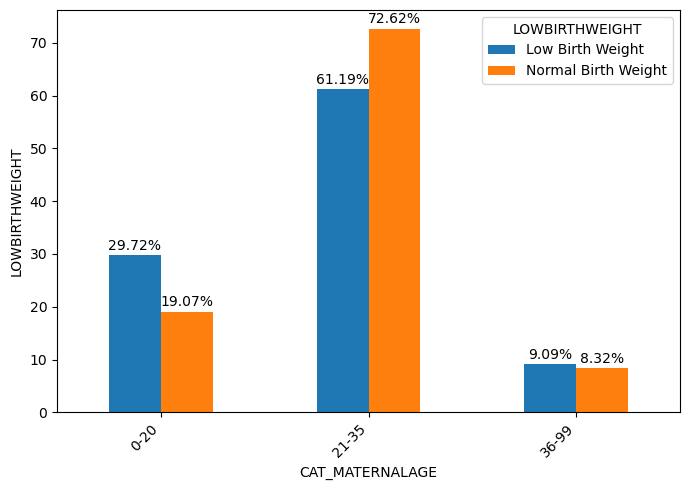

In [14]:
table = crosstable(df, 'CAT_MATERNALAGE', target)

cross_bargraph(table, target)

## Creating a Combined Crosstab Contingency Table

Now that we can a create crosstab contingency table for a single risk factor, we can reuse this function to generate other contingecy tables. However, this will create many differnt tables, making it difficult to follow and make a coherent analysis on. 

So, let's create a new function that create a combined crostab contingency table.

In [15]:

def combined_crosstabs(df, columns, target):
    tables = []
    
    for i, column in enumerate(columns):
        
        if column in df.columns:
            table = chi2_table(df, column, target)
            
            # Adding an identifying column to the table.
            table['Factor'] = column

            tables.append(table)
        else:
            print(f"Column '{column}' does not exist in the DataFrame.")

        # Combining the tables
    combined_tables = pd.concat([table for table in tables])
    
        # Reseting the Index 
    combined_tables.reset_index(inplace=True)
    combined_tables.rename(columns={'index': 'Categories'}, inplace=True)
    
    # Reordering the columns so that 'Table' becomes the first column
    cols = ['Factor'] + [col for col in combined_tables.columns if col != 'Factor']
    combined_tables = combined_tables[cols]

    
    return combined_tables




In [16]:
crosstab = combined_crosstabs(df, categorical_columns, target)
crosstab

LOWBIRTHWEIGHT,Factor,Categories,Low Birth Weight,Normal Birth Weight,Total,chi2,p
0,CAT_MATERNALAGE,0-20,85 (29.72%),204 (19.07%),289 (21.31%),16.378369,0.0026
1,CAT_MATERNALAGE,21-35,175 (61.19%),777 (72.62%),952 (70.21%),16.378369,0.0026
2,CAT_MATERNALAGE,36-99,26 (9.09%),89 (8.32%),115 (8.48%),16.378369,0.0026
3,LEVELOFEDUCATION,Basic,80 (27.97%),285 (26.64%),365 (26.92%),4.076809,0.6663
4,LEVELOFEDUCATION,Illiterate,133 (46.50%),474 (44.30%),607 (44.76%),4.076809,0.6663
5,LEVELOFEDUCATION,Secondary,47 (16.43%),166 (15.51%),213 (15.71%),4.076809,0.6663
6,LEVELOFEDUCATION,Tertiary,26 (9.09%),145 (13.55%),171 (12.61%),4.076809,0.6663
7,OCCUPATION,Civil Servant,24 (8.39%),135 (12.62%),159 (11.73%),10.651868,0.0998
8,OCCUPATION,Other,40 (13.99%),94 (8.79%),134 (9.88%),10.651868,0.0998
9,OCCUPATION,Self employed,125 (43.71%),505 (47.20%),630 (46.46%),10.651868,0.0998


There are a lot of rows in this table. So let's filter it down to all the factors that are significantly associated with delivering a baby with low birth weight

***p value < 0.05***

In [17]:
crosstab[crosstab["p"] < 0.05]


LOWBIRTHWEIGHT,Factor,Categories,Low Birth Weight,Normal Birth Weight,Total,chi2,p
0,CAT_MATERNALAGE,0-20,85 (29.72%),204 (19.07%),289 (21.31%),16.378369,0.0026
1,CAT_MATERNALAGE,21-35,175 (61.19%),777 (72.62%),952 (70.21%),16.378369,0.0026
2,CAT_MATERNALAGE,36-99,26 (9.09%),89 (8.32%),115 (8.48%),16.378369,0.0026
11,CAT_GRAVIDITY,1-1,121 (42.31%),309 (28.88%),430 (31.71%),19.787390,0.0006
12,CAT_GRAVIDITY,2-2,68 (23.78%),280 (26.17%),348 (25.66%),19.787390,0.0006
13,CAT_GRAVIDITY,3-9,97 (33.92%),481 (44.95%),578 (42.63%),19.787390,0.0006
14,CAT_PARITY,0-0,134 (46.85%),339 (31.68%),473 (34.88%),26.441331,0.0000
15,CAT_PARITY,1-1,75 (26.22%),295 (27.57%),370 (27.29%),26.441331,0.0000
16,CAT_PARITY,2-9,77 (26.92%),436 (40.75%),513 (37.83%),26.441331,0.0000
31,PTDlt37WEEKS,No,191 (66.78%),995 (92.99%),1186 (87.46%),141.359501,0.0000


### Interpretation of Results

These results show that a being pregnant while under the age of 20 years (29.72%) was significantly associated with deliverying a baby with LBW (P = 0.0026) as compared to the percentage of women who delivered normal birth weight babies (19.07%). Women who have never given birth before, CAT_PARITY == 0 (46.85%), or were being pregnant for the first time CAT_GRAVIDITY == 1 (42.31%) were also significantly associated with delivery a baby of LBW. 

Although only 0.81% of women developed severe pre-eclampsia, having severe pre-eclampsia was however significantly associated with delivering a child of LBW. Also, female babies were significantly found to have low birth weight when compared to male babes. These babies were significantly more likly to experience respiratory distress RESPIRATORYDISTRESS (14.34%), or end up being still born STILLBIRTH (7.69%). A significant proportion of these low birth weight babies end up dead NEONATALOUTCOME (5.94%)
 

***Significance***

These results are very significant in that, a statistically significant proportion of neonates born with LBW ended up being admitted to the neonatal intensive unit 'NICUADMISSION' (21.68%), far more than the proportion of babies born with a normal birth weight (5.79%). 

***Other things to note***

From the combined contingency table, we can see that the proportion of women dying from child birth has very low, 10 out of 1356 women(0.74%). This is a good testament to many of the strategies being implemented to combat maternal mortality. 

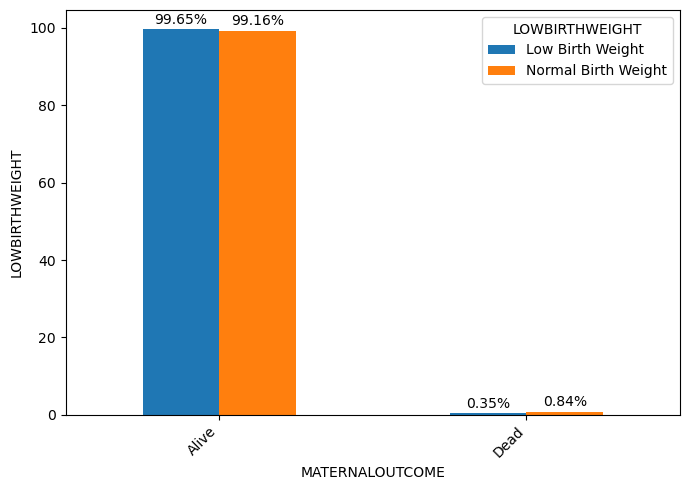

In [18]:
# Let's draw a graph to observe the maternal mortality distribution

table = crosstable(df, 'MATERNALOUTCOME', target)

cross_bargraph(table, target)

## Describing Distribution And Independent T-test Analysis of numerical columns

In [19]:
def t_test_table(df, columns, target):
    tables = []
    category1, category2 = df[target].unique()
    
    for column in columns:
        cat1_column = df[df[target] == category1][column]
        cat2_column = df[df[target] == category2][column]

        # Calculating mean and standard deviation for each category
        cat1_mean, cat1_std = cat1_column.mean(), cat1_column.std()
        cat2_mean, cat2_std = cat2_column.mean(), cat2_column.std()
        
        # Levene's test for homogeneity of variances
        levene_stat, levene_p = levene(cat1_column, cat2_column)
        
        # Independent t-test
        t_stat, t_p = ttest_ind(cat1_column, cat2_column, equal_var=(levene_p > 0.05))
        
        # Creating a DataFrame for the current column
        table = pd.DataFrame({
            'Factor': [column, column],
            target: [category1, category2],
            'Mean': [cat1_mean, cat2_mean],
            'Std': [cat1_std, cat2_std],
            'Levene_stat': [levene_stat, None],
            'Levene_p': [round(levene_p, 4), None],
            'T_stat': [t_stat, None],
            'T_p': [round(t_p, 4), None]
        })
        
        tables.append(table)
    
    return pd.concat(tables, ignore_index=True)

In [20]:
t_table = t_test_table(df, numerical_columns, target)
t_table

,Factor,LOWBIRTHWEIGHT,Mean,Std,Levene_stat,Levene_p,T_stat,T_p
0,MATERNALAGE,Normal Birth Weight,26.515092,6.181207,0.801953,0.3707,3.133808,0.0018
1,MATERNALAGE,Low Birth Weight,25.204466,6.649921,NaN,NaN,NaN,NaN
2,GRAVIDITY,Normal Birth Weight,2.654941,1.557196,0.599192,0.4390,3.147396,0.0017
3,GRAVIDITY,Low Birth Weight,2.327223,1.590233,NaN,NaN,NaN,NaN
4,PARITY,Normal Birth Weight,1.473187,1.445094,0.043367,0.8351,3.270399,0.0011
5,PARITY,Low Birth Weight,1.155266,1.516309,NaN,NaN,NaN,NaN
6,NO.ANTENALVISITS,Normal Birth Weight,7.335388,2.510757,2.205377,0.1378,6.283112,0.0000
7,NO.ANTENALVISITS,Low Birth Weight,6.281829,2.549706,NaN,NaN,NaN,NaN
8,HB_Delivery,Normal Birth Weight,10.548269,1.224156,4.577979,0.0326,-0.635344,0.5257
9,HB_Delivery,Low Birth Weight,10.786367,6.305985,NaN,NaN,NaN,NaN


### Interpretation of Results

As has already been seen, increasing age, was significantly associated with the delivery of LBW babies. The same is also true for the increasing number of previous pregnancies (GRAVIDITY) or previous child births (PARITY). Women who delivered LBW babies visited the antenatal care clinic on fewer occassions that women who gave birth to normal weight babies. Women who delivered at a mean number of 37 weeks were significatnly associated with LBW children then their counterparts who delivered at an average 39 weeks. 

### Because we have functions for describing both the categorical and numerical parameters of the data, we can explore this even further with other target columns.

## Risk Factors of Still Birth

In [21]:
crosstab = combined_crosstabs(df, categorical_columns, 'NEONATALOUTCOME')
crosstab[crosstab["p"] < 0.05]

NEONATALOUTCOME,Factor,Categories,Alive,Dead,Total,chi2,p
21,RETROSTATUS,Non Reactive,1310 (99.32%),35 (94.59%),1345 (99.19%),9.977921,0.0068
22,RETROSTATUS,Reactive,9 (0.68%),2 (5.41%),11 (0.81%),9.977921,0.0068
31,PTDlt37WEEKS,No,1160 (87.95%),26 (70.27%),1186 (87.46%),10.254122,0.0059
32,PTDlt37WEEKS,Yes,159 (12.05%),11 (29.73%),170 (12.54%),10.254122,0.0059
51,STILLBIRTH,No,1311 (99.39%),6 (16.22%),1317 (97.12%),891.384515,0.0000
52,STILLBIRTH,Yes,8 (0.61%),31 (83.78%),39 (2.88%),891.384515,0.0000
53,IUGR,No,1297 (98.33%),34 (91.89%),1331 (98.16%),8.248669,0.0162
54,IUGR,Yes,22 (1.67%),3 (8.11%),25 (1.84%),8.248669,0.0162
55,NEONATALOUTCOME,Alive,1319 (100.00%),0 (0.00%),1319 (97.27%),1356.000000,0.0000
56,NEONATALOUTCOME,Dead,0 (0.00%),37 (100.00%),37 (2.73%),1356.000000,0.0000


We can see that a lot of still born children 

In [22]:
t_table = t_test_table(df, numerical_columns, 'NEONATALOUTCOME')
t_table[t_table["T_p"] < 0.05]

,Factor,NEONATALOUTCOME,Mean,Std,Levene_stat,Levene_p,T_stat,T_p
6,NO.ANTENALVISITS,Alive,7.138081,2.548965,0.586811,0.4438,2.146266,0.0320
10,GESTATIONALAGE,Alive,38.588324,2.143462,10.503236,0.0012,2.354816,0.0240
12,SBPBEFOREDELIVERY,Alive,115.480179,13.946330,1.105289,0.2933,-2.023612,0.0432
20,BIRTHWEIGHT,Alive,2.923778,0.766594,4.104507,0.0430,3.654713,0.0008
22,APGARAT1MIN,Alive,7.258009,1.328007,9.594935,0.0020,11.415813,0.0000
24,APGARAT5MIN,Alive,8.432675,1.250033,22.518650,0.0000,11.829384,0.0000


As statistical analysis goes, it would have been great to perform a simple logistical analysis to more specifically  determine to the extent of risk a parameter poses to deliverying a child of LBW. 

Fortunately, this can be addressed by building a machine learning algorithm, which can give us the weights of effects. 